In [7]:
#installation

!pip install split-folders
!pip install tensorflow
!pip install matplotlib
!pip install sklearn

In [1]:
import splitfolders
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
import glob, random
import matplotlib.pyplot as plt

print(tf.__version__)
ROOT_DIR = os.path.abspath(os.curdir)

2.5.1


In [2]:
# split training data into two folders train and validation with ratio 80 and 20 percent.

splitfolders.ratio(ROOT_DIR+"/CSGO-gun-dataset/Train", output=ROOT_DIR+"/training-data", seed=1337, ratio=(.8, .2), group_prefix=None)

In [3]:
ImageDataGenerators = tf.keras.preprocessing.image.ImageDataGenerator

TRAINING_DIR = ROOT_DIR+"/training-data/train/"
VALIDATION_DIR = ROOT_DIR+"/training-data/val/"

train_datagen = ImageDataGenerators(rescale=1.0/255.)
validation_datagen = ImageDataGenerators(rescale=1.0/255.)

In [4]:
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode="categorical",
                                                    target_size=(150, 150))


validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode="categorical",
                                                              target_size=(150, 150))

Found 650 images belonging to 33 classes.
Found 177 images belonging to 33 classes.


In [5]:
class_dict = train_generator.class_indices # returns ie. {'aligator': 0, 'cat': 1, 'dog': 2}

In [6]:
class_dict

{'AK-47': 0,
 'AWP': 1,
 'Aug': 2,
 'CZ-75': 3,
 'Famas': 4,
 'Five_Seven': 5,
 'G3SG1': 6,
 'Galil-AR': 7,
 'Glock': 8,
 'M249': 9,
 'M4A1': 10,
 'M4A4': 11,
 'MAC-10': 12,
 'MP-5': 13,
 'MP-7': 14,
 'MP-9': 15,
 'Mag-7': 16,
 'Negev': 17,
 'Nova': 18,
 'P-2000': 19,
 'P-90': 20,
 'P250': 21,
 'Revolver': 22,
 'SG-553': 23,
 'Sawed-Off': 24,
 'Scar-20': 25,
 'Scout': 26,
 'Tec-9': 27,
 'UMP': 28,
 'USP': 29,
 'XM-1014': 30,
 'dual_pistol': 31,
 'pp': 32}

In [7]:
number_Class = len(class_dict)

In [8]:
number_Class

33

In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(number_Class, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

/Data/LFD-Projects/EnvTestExample/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1935: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
7/7 [==============================] - 8s 1s/step - loss: 3.0081 - accuracy: 0.2231 - val_loss: 1.9242 - val_accuracy: 0.6328
Epoch 2/5
7/7 [==============================] - 4s 584ms/step - loss: 0.9228 - accuracy: 0.8215 - val_loss: 0.1875 - val_accuracy: 0.9831

In [21]:
model.save('Gun-Classification.h5')

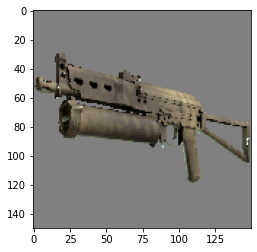

pp


In [22]:
#Predictions
# Execute Predictions cell every time, Random image pass to the model

image = keras.preprocessing.image
model = keras.models.load_model('Gun-Classification.h5')

#path to any image to be predicted
TestImage = glob.glob(ROOT_DIR+"/CSGO-gun-dataset/Test/*/*")
images = glob.glob(random.choice(TestImage))
random_image = random.choice(images)

img = image.load_img(random_image, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=1)
y_classes = classes.argmax(axis=-1)

name = list(class_dict.keys())[list(class_dict.values()).index(y_classes[0])]
imgplot = plt.imshow(img)
plt.show()
print(name)